In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
import re
from bs4 import BeautifulSoup

In [2]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
sample_text = 'Fantastic, I have no words to describe my feelings'
tokens = tokenizer.encode(sample_text, return_tensors='pt')
result = model(tokens)
sentiment = int(torch.argmax(result.logits)) + 1
print(f"Sentiment score for sample text: {sentiment}")

Sentiment score for sample text: 5


In [14]:
def scrape_reviews(url):
    reviews = []
    
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    regex = re.compile('.*comment.*')
    results = soup.find_all('p', {'class': regex})
    
    reviews.extend([result.text for result in results])
    return reviews

In [15]:
# Desired Yelp business URL
base_url = 'https://www.yelp.com/biz/patxis-pizza-san-francisco-2?start='

all_reviews = []
for page in range(0, 100, 20): 
    url = base_url + str(page)
    reviews = scrape_reviews(url)
    all_reviews.extend(reviews)

In [16]:
all_reviews

['We stopped in because the pizza pics on yelp looked so appetizing and there was plenty of seating. Our server was very sweet and helpful, offering us suggestions. PERK - Get a free dessert Stromboli with a pizza purchase!EVERYTHING was AMAZING!!!',
 'Really disappointing deterioration @ Patxi\'s They\'ve taken that bad step of now bloating the dough quotient in their deep dish and skimping on the part of the pizza - ie the ingredients- you actually want. Had their BBQ combination yesterday and almost needed a search party to find any trace of chicken in it . Pizza was 40% dough , ie flour and water . Borderline disgusting.They\'ve also jacked up their prices , and they now impose 5% "SF Mandate" , and the service has really deteriorated as well. Well, barely any service actually at all TBH.Nice memories of this place before the stupid management decisions recently to screw their loyal customers in every direction as presumably this location teeters on the verge of death spiral and cl

In [17]:
df = pd.DataFrame(all_reviews, columns=['review'])

In [18]:
df.head()

,review
0,We stopped in because the pizza pics on yelp l...
1,Really disappointing deterioration @ Patxi's T...
2,"Firstly, ignore the reviews from all the child..."
3,I got Uber eats delivery. I've had plenty of p...
4,If I can give no stars I would1. It took 25 mi...


In [19]:
def get_sentiment(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    score =  int(torch.argmax(result.logits)) + 1
    return score

In [20]:
df['sentiment'] = df['review'].apply(lambda x: get_sentiment(x[:512]))

In [21]:
df.head(10)

,review,sentiment
0,We stopped in because the pizza pics on yelp l...,5
1,Really disappointing deterioration @ Patxi's T...,1
2,"Firstly, ignore the reviews from all the child...",2
3,I got Uber eats delivery. I've had plenty of p...,2
4,If I can give no stars I would1. It took 25 mi...,2
5,Came here with a group of 5 where we were seat...,2
6,OOF. First time there since the pandemic. What...,1
7,My friend hosted a fun gathering and ordered n...,4
8,"The place was quiet, a few people inside dinin...",3
9,Great pizza. We got the classic thin crust piz...,4


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7056\2876544925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


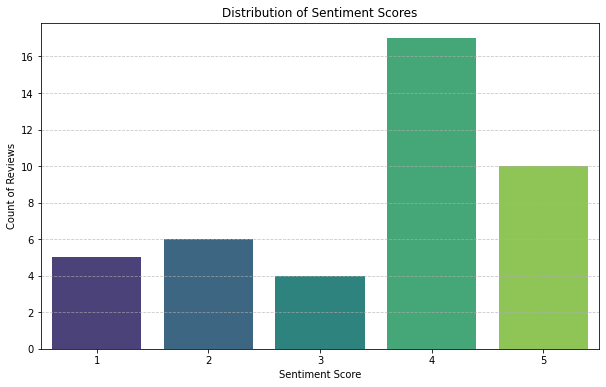

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()